In [22]:
path = 'C:/Users/IFAM_CMZL/Downloads/VC/'

In [108]:
!pip list

Package                   Version
------------------------- --------------
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
exceptiongroup            1.2.1
executing                 2.0.1
fastjsonschema            2.19.1
fonttools                 4.51.0
fqdn                      1.5.1
h11                       0.14.0
httpcore                  1.0.5
httpx                     0.27.0
idna           

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [110]:
dados = pd.read_csv(path + "ConsumoxCo2.csv")

In [111]:
dados.describe

<bound method NDFrame.describe of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTI

In [112]:
dados.head

<bound method NDFrame.head of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_C

In [113]:
dados.groupby('MAKE').count

<bound method GroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000200C8045690>>

In [114]:
selecao = dados[["ENGINESIZE", "CO2EMISSIONS" ]]

In [115]:
selecao.head

<bound method NDFrame.head of       ENGINESIZE  CO2EMISSIONS
0            2.0           196
1            2.4           221
2            1.5           136
3            3.5           255
4            3.5           244
...          ...           ...
1062         3.0           271
1063         3.2           264
1064         3.0           271
1065         3.2           260
1066         3.2           294

[1067 rows x 2 columns]>

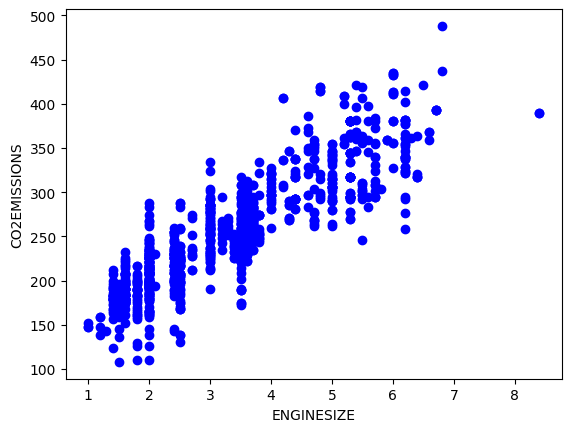

In [116]:
plt.scatter(selecao["ENGINESIZE"], selecao[ "CO2EMISSIONS"], color = "blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

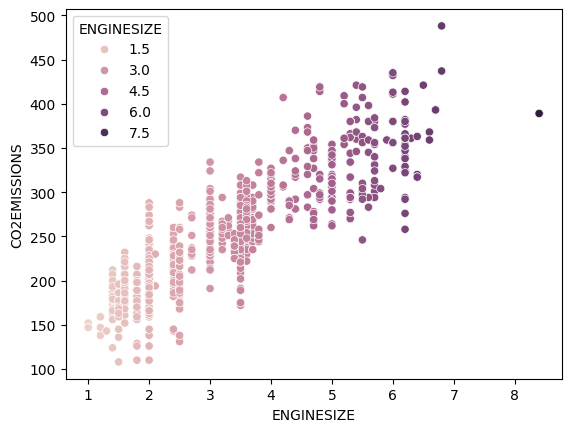

In [117]:
ax = sns.scatterplot(x="ENGINESIZE", y="CO2EMISSIONS", data=selecao, color= "blue", hue="ENGINESIZE" )

In [118]:
treino = selecao[:(int((len(selecao)*0.8)))]
teste =  selecao[(int((len(selecao)*0.8))):]

In [119]:
len(treino), len(teste)

(853, 214)

In [120]:
treino.shape, teste.shape

((853, 2), (214, 2))

In [121]:
modelo = linear_model.LinearRegression()

In [122]:
train_X = np.array(treino[["ENGINESIZE"]]) 
train_y = np.array(treino[["CO2EMISSIONS"]])

In [123]:
modelo.fit(train_X, train_y)

LinearRegression()

In [124]:
print('Intercept:', modelo.intercept_)

Intercept: [127.16989951]


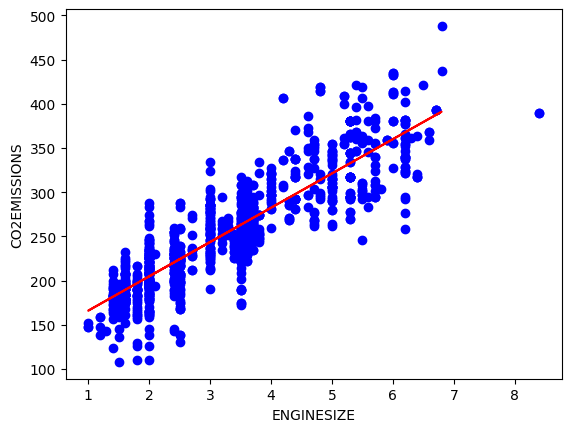

In [125]:
plt.scatter(selecao["ENGINESIZE"], selecao[ "CO2EMISSIONS"], color = "blue")
plt.plot(train_X, modelo.coef_ * train_X+ modelo.intercept_, '-r' )
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [126]:
def pred_modelo(features, intercept, slope):
    pred = features * slope + intercept
    return pred

In [127]:
potencia = 8.0
emissao_estimada = pred_modelo(potencia, modelo.intercept_[0], modelo.coef_[0][0])
print('Emissao de CO2 estimada para um engine', potencia, 'é: ', emissao_estimada)

Emissao de CO2 estimada para um engine 8.0 é:  437.530890197272


In [128]:
modelo.coef_?

Type:        ndarray
String form: [[38.79512384]]
Length:      1
File:        c:\users\ifam_cmzl\.conda\envs\visao_am\lib\site-packages\numpy\__init__.py
Docstring:  
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more information, refer to the `numpy` module and examine the
methods and attributes of an array.

Parameters
----------
(for the __new__ method; see Notes below)

shape : tuple of ints
    Shape of created array.
dtype : data-type, optiona

In [129]:
sns.pairplot(df_iris, kind = 'scatter')
plt.show()

NameError: name 'df_iris' is not defined

In [130]:
import pandas as pd


In [131]:
df_mkt = pd.read_csv(path + 'dados_marketing.csv')

In [132]:
df_mkt

,Data,Semana,Semana_ID,Mes,Mes_ID,Ano,Nome_Dia,Visitantes,Vendas,Gastos_Mkt,Promo
0,09/11/2020,46,34,11,11,2020,Segunda,707,465,651.375000,Nenhuma
1,10/11/2020,46,34,11,11,2020,Terça,1455,10386,1298.250000,Promo Vermelha
2,11/11/2020,46,34,11,11,2020,Quarta,1520,12475,1559.375000,Promo Azul
3,12/11/2020,46,34,11,11,2020,Quinta,1726,11712,1801.750000,Nenhuma
4,13/11/2020,46,34,11,11,2020,Sexta,2134,10000,2614.500000,Nenhuma
...,...,...,...,...,...,...,...,...,...,...,...
177,05/05/2021,19,60,5,17,2021,Quarta,1400,7284,1119.600000,Nenhuma
178,06/05/2021,19,60,5,17,2021,Quinta,2244,13021,2067.888889,Promo Vermelha
179,07/05/2021,19,60,5,17,2021,Sexta,2023,4587,1450.200000,Nenhuma
180,08/05/2021,19,60,5,17,2021,Sábado,1483,5927,1121.875000,Nenhuma


In [133]:
df_mkt.describe()

,Semana,Semana_ID,Mes,Mes_ID,Ano,Visitantes,Vendas,Gastos_Mkt
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,21.785714,47.351648,5.269231,13.774725,2020.708791,1666.730769,10581.593407,1396.356564
std,18.369841,7.892053,4.204580,1.783540,0.455573,503.528049,6297.626426,691.867416
min,1.000000,34.000000,1.000000,11.000000,2020.000000,488.000000,292.000000,322.000000
25%,8.000000,40.000000,2.000000,12.000000,2020.000000,1339.000000,5929.500000,880.431250
50%,14.000000,48.000000,4.000000,14.000000,2021.000000,1546.000000,9452.000000,1223.900000
75%,47.000000,54.000000,11.000000,15.000000,2021.000000,2027.500000,12959.500000,1676.450000
max,53.000000,61.000000,12.000000,17.000000,2021.000000,4139.000000,36283.000000,4535.375000


In [134]:
df_mkt.groupby('Promo').sum('Gasto_MKt')

,Semana,Semana_ID,Mes,Mes_ID,Ano,Visitantes,Vendas,Gastos_Mkt
Promo,,,,,,,,
Nenhuma,1582,3503,384,1020,149533,120446,438415,87073.155555
Promo Azul,1177,2543,285,741,109118,96709,902101,98805.496969
Promo Vermelha,1206,2572,290,746,109118,86190,585334,68258.242173


In [135]:
df_mkt.groupby('Promo').sum('Gastos_Mkt').sort_values('Gastos_Mkt', ascending = True)

,Semana,Semana_ID,Mes,Mes_ID,Ano,Visitantes,Vendas,Gastos_Mkt
Promo,,,,,,,,
Promo Vermelha,1206,2572,290,746,109118,86190,585334,68258.242173
Nenhuma,1582,3503,384,1020,149533,120446,438415,87073.155555
Promo Azul,1177,2543,285,741,109118,96709,902101,98805.496969


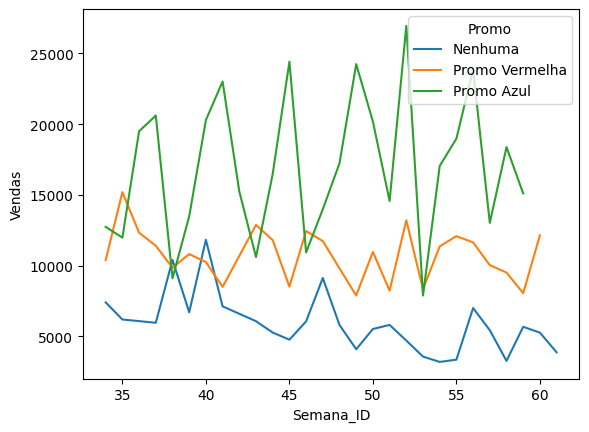

In [136]:
grafl = sns.lineplot(x = 'Semana_ID', y ='Vendas',  hue = 'Promo', data = df_mkt, errorbar = None)

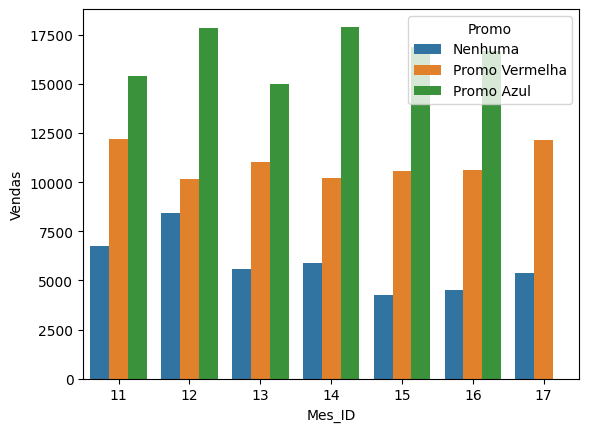

In [137]:
graf3 = sns.barplot(x = 'Mes_ID', y = 'Vendas', hue = 'Promo', data = df_mkt, errorbar = None)

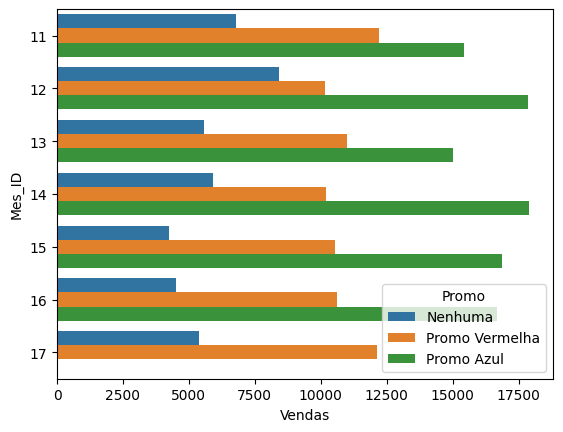

In [138]:
graf3 = sns.barplot(x = 'Vendas', y = 'Mes_ID', hue = 'Promo', orient = 'h', data = df_mkt, errorbar = None)

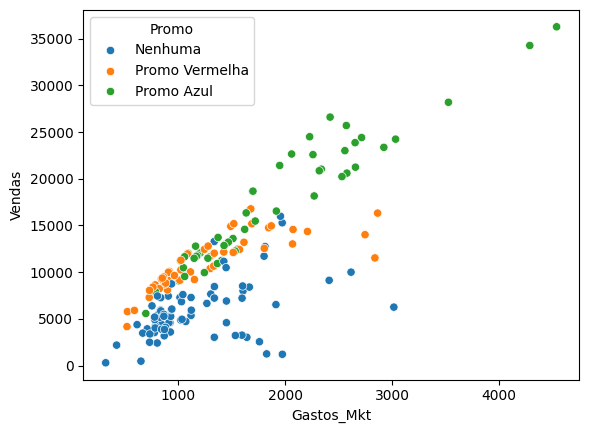

In [139]:
graf = sns.scatterplot(x = 'Gastos_Mkt', y = 'Vendas', hue = 'Promo', data = df_mkt)

In [140]:
cols = ['Vendas', 'Visitantes', 'Gastos_Mkt']

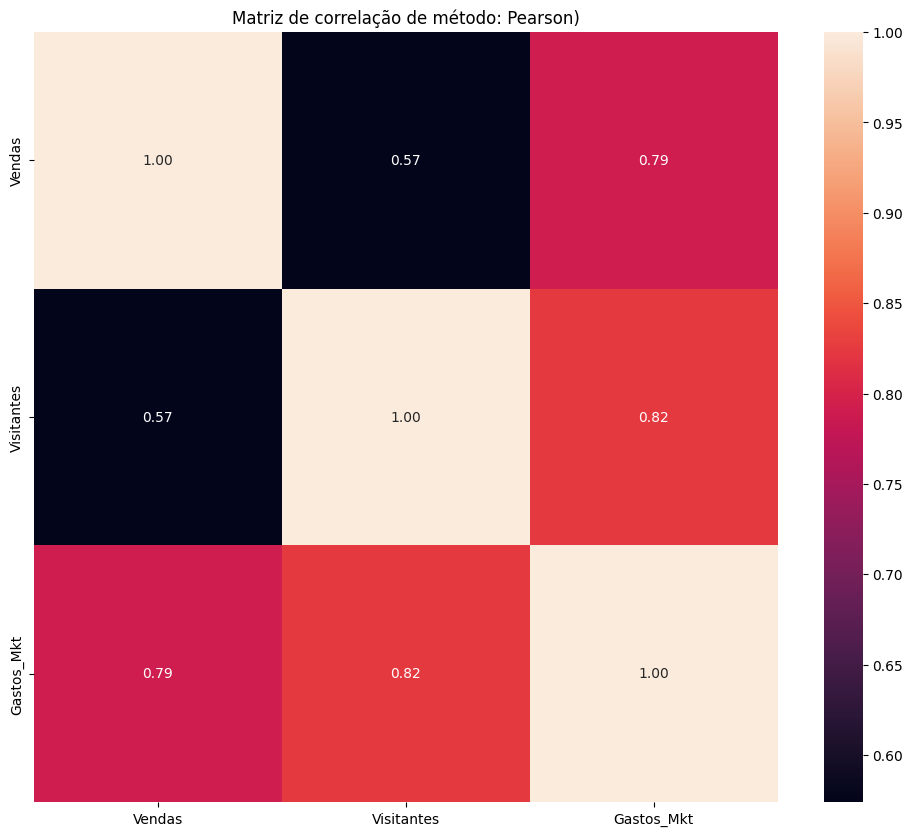

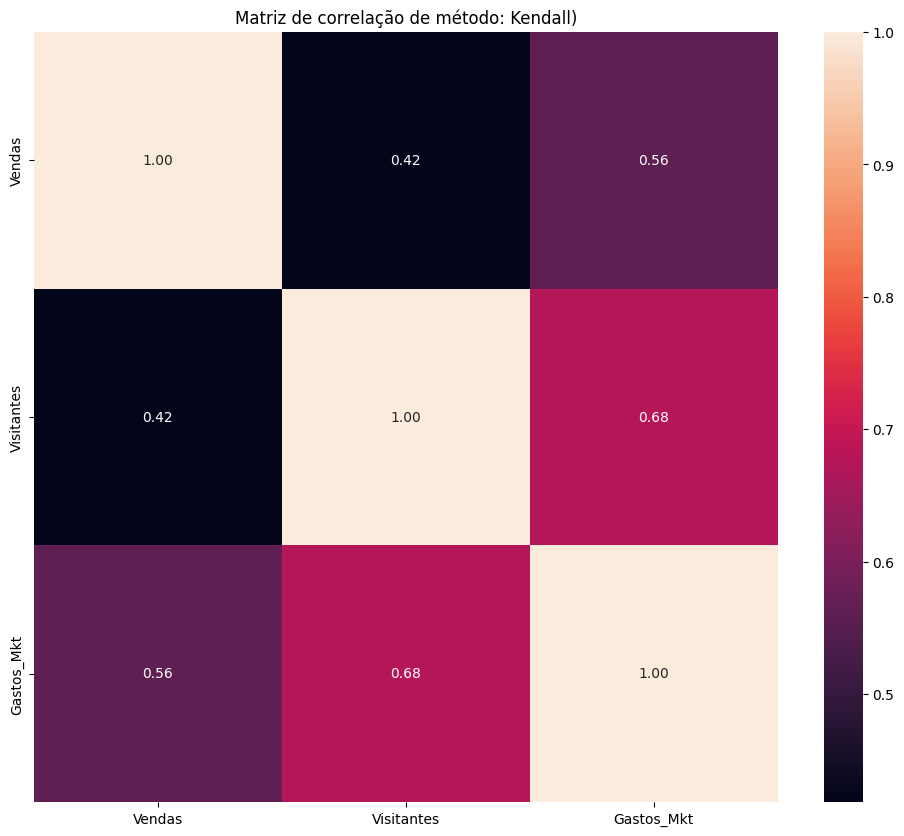

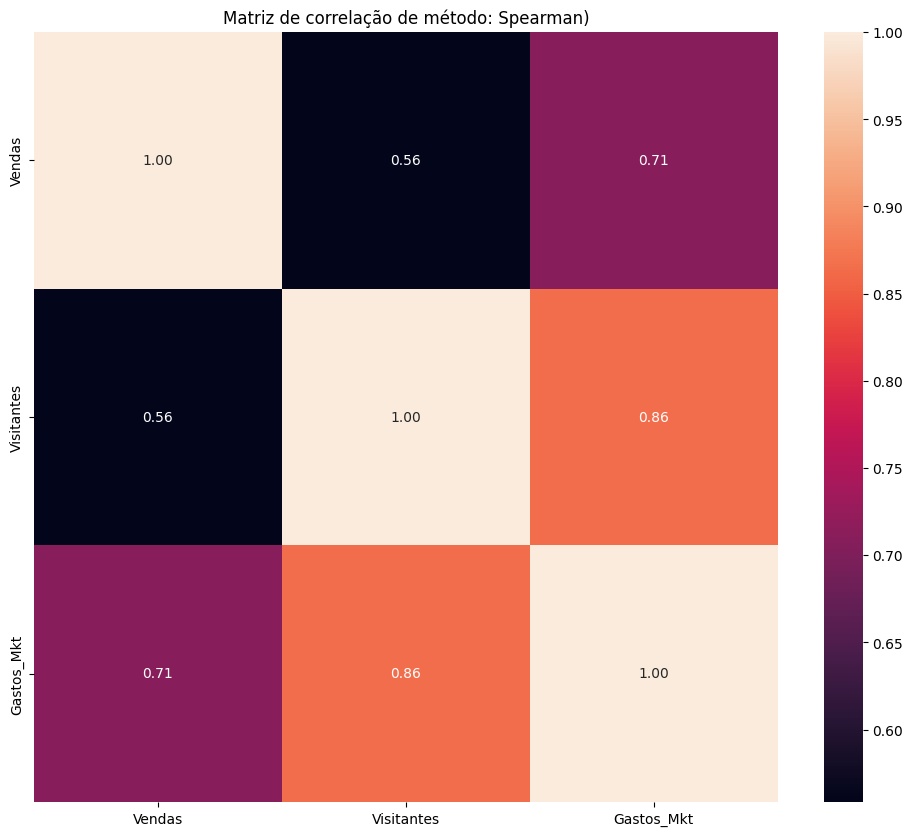

In [141]:
tipos_corr = ['pearson', 'kendall', 'spearman']
for tipo in tipos_corr:
    mc=df_mkt[cols].corr(method = tipo)
    plt.figure(figsize=(12,10))
    sns.heatmap(mc, annot = True, fmt = '.2f')
    plt.title(f'Matriz de correlação de método: {tipo.capitalize()})')
    plt.show()

Árvores de decisão

In [142]:
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.model_selection import train_test_split

In [143]:
X, y = make_classification(100, 10, n_classes =2, shuffle = True, random_state = 10)

In [144]:
X

array([[-1.17920450e+00, -8.73997503e-01, -5.08496501e-02,
        -1.12375420e+00, -2.68549400e-01, -1.85735817e+00,
        -2.16524932e-01,  9.20364276e-01,  6.99465413e-01,
        -4.24211421e-01],
       [ 8.41395554e-02, -1.31862667e+00,  2.79605392e-01,
         6.20254502e-01,  7.76471305e-01, -1.06856771e+00,
        -7.22620734e-01, -7.89816228e-01, -1.07480660e+00,
         1.90230404e+00],
       [ 5.40540713e-01, -1.06169475e+00, -8.62758299e-01,
        -7.41824839e-01,  7.16442009e-01,  1.10557514e+00,
        -2.01771865e+00, -8.04171891e-01, -1.02990299e+00,
        -2.86002008e-01],
       [-1.10612324e+00,  2.88861254e+00,  6.76708195e-01,
         6.07278235e-02, -2.08229441e-01, -2.30411884e-02,
        -5.53318428e-01, -1.02170728e+00, -3.36402451e-01,
        -1.68044592e+00],
       [-1.74673584e+00,  9.82998091e-01, -4.79034566e-01,
        -1.28912470e+00, -6.58427057e-01, -9.74199592e-01,
        -1.94102532e-01,  7.35512588e-01,  9.44712307e-01,
        -6.

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 1)

In [146]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70, 10), (30, 10), (70,), (30,))

In [147]:
y_train

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1])

In [148]:
y_test

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1])

In [149]:
modelo = tree.DecisionTreeClassifier()
modelo = modelo.fit(X_train, y_train)

In [150]:
predicoes = modelo.predict(X_test)

In [151]:
predicoes

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1])

[Text(0.5, 0.875, 'x[1] <= -0.6\ngini = 0.496\nsamples = 70\nvalue = [32, 38]'),
 Text(0.25, 0.625, 'x[8] <= 1.699\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.625, 'x[2] <= -1.147\ngini = 0.051\nsamples = 38\nvalue = [1, 37]'),
 Text(0.625, 0.375, 'x[7] <= 0.11\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 35\nvalue = [0, 35]')]

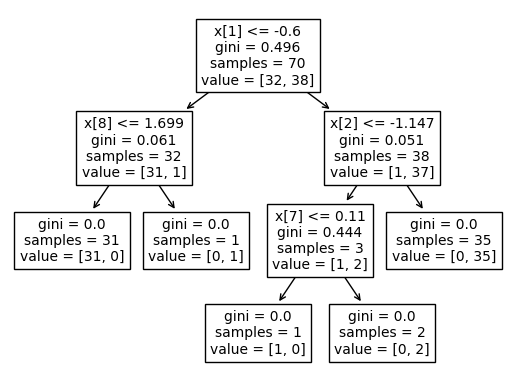

In [152]:
tree.plot_tree(modelo)

In [153]:
df_co2 =  pd.read_csv(path + 'ConsumoxCo2.csv')

In [154]:
df_co2

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [155]:
X = df_co2.drop(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], axis = 1)
y = df_co2['CO2EMISSIONS']

In [156]:
X

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
1062,2014,3.0,6,13.4,9.8,11.8,24,271
1063,2014,3.2,6,13.2,9.5,11.5,25,264
1064,2014,3.0,6,13.4,9.8,11.8,24,271
1065,2014,3.2,6,12.9,9.3,11.3,25,260


In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 0)

In [158]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((746, 8), (321, 8), (746,), (321,))

In [159]:
modelo_reg= tree.DecisionTreeRegressor()
modelo_reg = modelo.fit(X_train, y_train)

In [160]:
predicoes = modelo_reg.predict(X_test)

In [161]:
predicoes

array([359, 209, 230, 212, 168, 292, 212, 276, 202, 334, 313, 435, 224,
       281, 177, 260, 414, 223, 251, 356, 191, 189, 244, 242, 126, 283,
       274, 294, 246, 108, 359, 239, 228, 237, 191, 196, 294, 221, 237,
       237, 184, 184, 202, 166, 297, 198, 260, 179, 344, 359, 338, 290,
       290, 126, 230, 179, 283, 159, 258, 209, 207, 205, 225, 294, 262,
       301, 354, 230, 207, 126, 304, 189, 354, 270, 338, 216, 283, 179,
       235, 166, 186, 253, 161, 334, 407, 246, 191, 172, 290, 258, 262,
       209, 283, 344, 359, 368, 168, 221, 368, 262, 182, 320, 126, 166,
       202, 196, 200, 290, 191, 259, 214, 228, 269, 317, 327, 294, 292,
       244, 361, 200, 258, 191, 382, 147, 179, 310, 228, 237, 292, 264,
       230, 294, 184, 138, 344, 373, 283, 108, 198, 232, 262, 191, 344,
       368, 189, 175, 285, 343, 299, 138, 179, 251, 161, 235, 310, 242,
       292, 221, 324, 235, 177, 209, 177, 202, 242, 205, 264, 184, 409,
       334, 260, 285, 235, 299, 281, 276, 265, 242, 184, 343, 29

tree.plot_tree(modelo_reg)

In [162]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [163]:
digits = load_digits()

In [164]:
len(digits.feature_names)

64

In [165]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [166]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

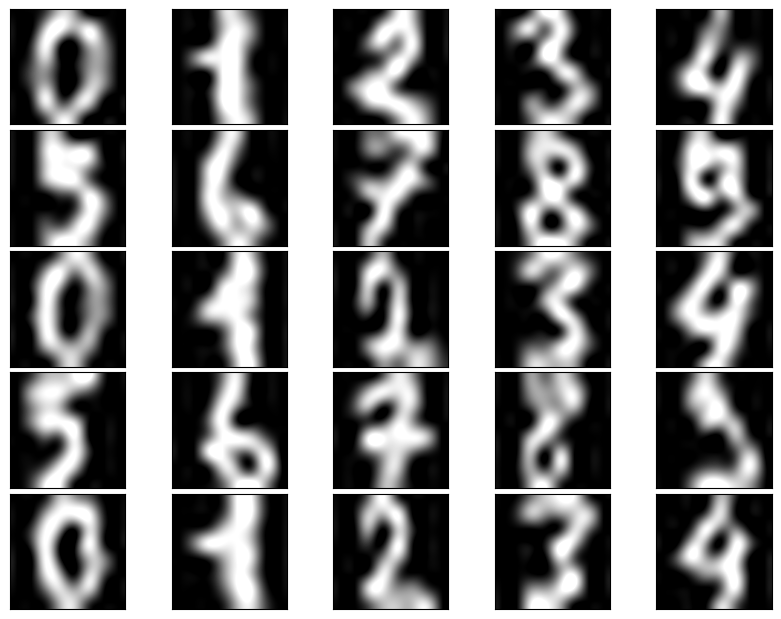

In [167]:
fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(left = 0, right = 1, bottom =0, top = 1, hspace = 0.05, wspace = 0.05)

for i in range(25):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.gray, interpolation='lanczos')

In [179]:
X = digits.data
y = digits.target

In [180]:
def mostra_digito(num, tam):
    plt.figure(figsize=(tam))
    plt.imshow(digits.images[num],cmap=plt.cm.gray, interpolation='bicubic' )

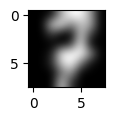

In [181]:
mostra_digito(300, (1, 1))

In [182]:
X.shape, y.shape

((1797, 64), (1797,))

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
modelo_knn= KNN(n_neighbors = 5)

In [ ]:
modelo_knn.fit(X_train, y_train)

In [ ]:
predicoes = modelo_knn.predict(X_test)

In [ ]:
acuracia = modelo_knn.score(X_test, y_test)
print('Acuracia: ', acuracia)

In [ ]:
matriz_confusao = metrics.confusion_matrix(y_test, predicoes)
print('Matriz de confusão')
print(matriz_confusao)

In [ ]:
relat_class = metrics.classification_report(y_test, predicoes_rf)
print('Matriz de confusão')
print(relat_class)

In [186]:
from sklearn.ensemble import RandomForestClassifier as RF

In [188]:
modelo_RF = RF(n_estimators = 500)

In [189]:
modelo_RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [193]:
predicoes_rf = modelo_RF.predict(X_test)
acuracia = modelo_RF.score(X_test, y_test)
print('Acuracia: ', acuracia)

Acuracia:  0.9796296296296296


In [195]:
matriz_confusao = metrics.confusion_matrix(y_test, predicoes_rf)
print('Matriz de confusão')
print(matriz_confusao)

Matriz de confusão
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  0  1  0  0  0  0]
 [ 1  1 51  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 55  1  0  0  1]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0]
 [ 0  1  0  2  0  0  0  0 58  0]
 [ 0  0  0  0  0  1  0  0  0 56]]


In [197]:
relat_class = metrics.classification_report(y_test, predicoes_rf)
print('Matriz de confusão')
print(relat_class)

Matriz de confusão
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       0.96      0.98      0.97        52
           2       1.00      0.96      0.98        53
           3       0.96      0.98      0.97        54
           4       1.00      0.98      0.99        48
           5       0.96      0.96      0.96        57
           6       0.98      1.00      0.99        60
           7       0.98      1.00      0.99        53
           8       0.98      0.95      0.97        61
           9       0.98      0.98      0.98        57

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [65]:
import numpy as np
import tensorflow.keras as tk
import keras
import keras.datasets as ds
from keras import layers
from datetime import datetime

In [66]:
num_classes = 10

In [67]:
input_shape = (28,28,1)

In [68]:
mnist = tk.datasets.mnist

In [69]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [71]:
import matplotlib.pyplot as plt

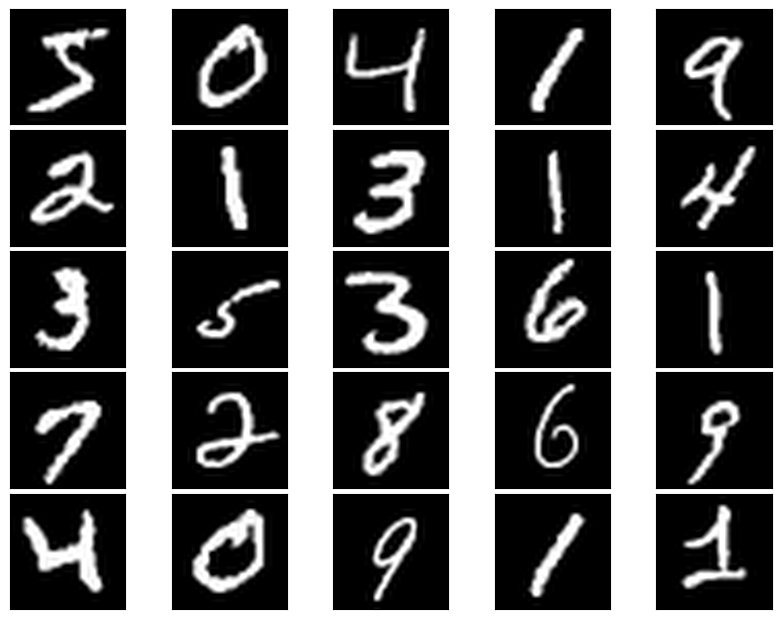

In [72]:
fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(left = 0, right = 1, bottom =0, top = 1, hspace = 0.05, wspace = 0.05)

for i in range(25):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.gray, interpolation='lanczos')

In [73]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [74]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [75]:
y_train = tk.utils.to_categorical(y_train, num_classes)
y_test = tk.utils.to_categorical(y_test, num_classes)

In [76]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [77]:
modelo = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size = (3 ,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size = (3 ,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ]
 
)
print(modelo.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 10)               

In [78]:
batch_size = 128
epochs = 5
modelo.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
modelo.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 6s 12ms/step - loss: 0.7356 - accuracy: 0.9143 - val_loss: 0.1100 - val_accuracy: 0.9722
Epoch 2/5
422/422 [==============================] - 5s 12ms/step - loss: 0.0958 - accuracy: 0.9731 - val_loss: 0.0942 - val_accuracy: 0.9735
Epoch 3/5
422/422 [==============================] - 5s 13ms/step - loss: 0.0642 - accuracy: 0.9809 - val_loss: 0.0697 - val_accuracy: 0.9792
Epoch 4/5
422/422 [==============================] - 5s 12ms/step - loss: 0.0461 - accuracy: 0.9862 - val_loss: 0.0589 - val_accuracy: 0.9835
Epoch 5/5
422/422 [==============================] - 5s 12ms/step - loss: 0.0374 - accuracy: 0.9887 - val_loss: 0.0627 - val_accuracy: 0.9843


In [79]:
score = modelo.evaluate(X_test, y_test)
print("Erro no teste: ", round(score[0], 5))
print("Acuracia no teste: ", round(score[1], 5))

313/313 [==============================] - 1s 2ms/step - loss: 0.0587 - accuracy: 0.9834
Erro no teste:  0.05874
Acuracia no teste:  0.9834


In [80]:
modelo.save('treino_mnist_08062024.keras')

In [81]:
pwd

'C:\\Users\\IFAM_CMZL\\Downloads\\VC'